In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel('http://taanila.fi/ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


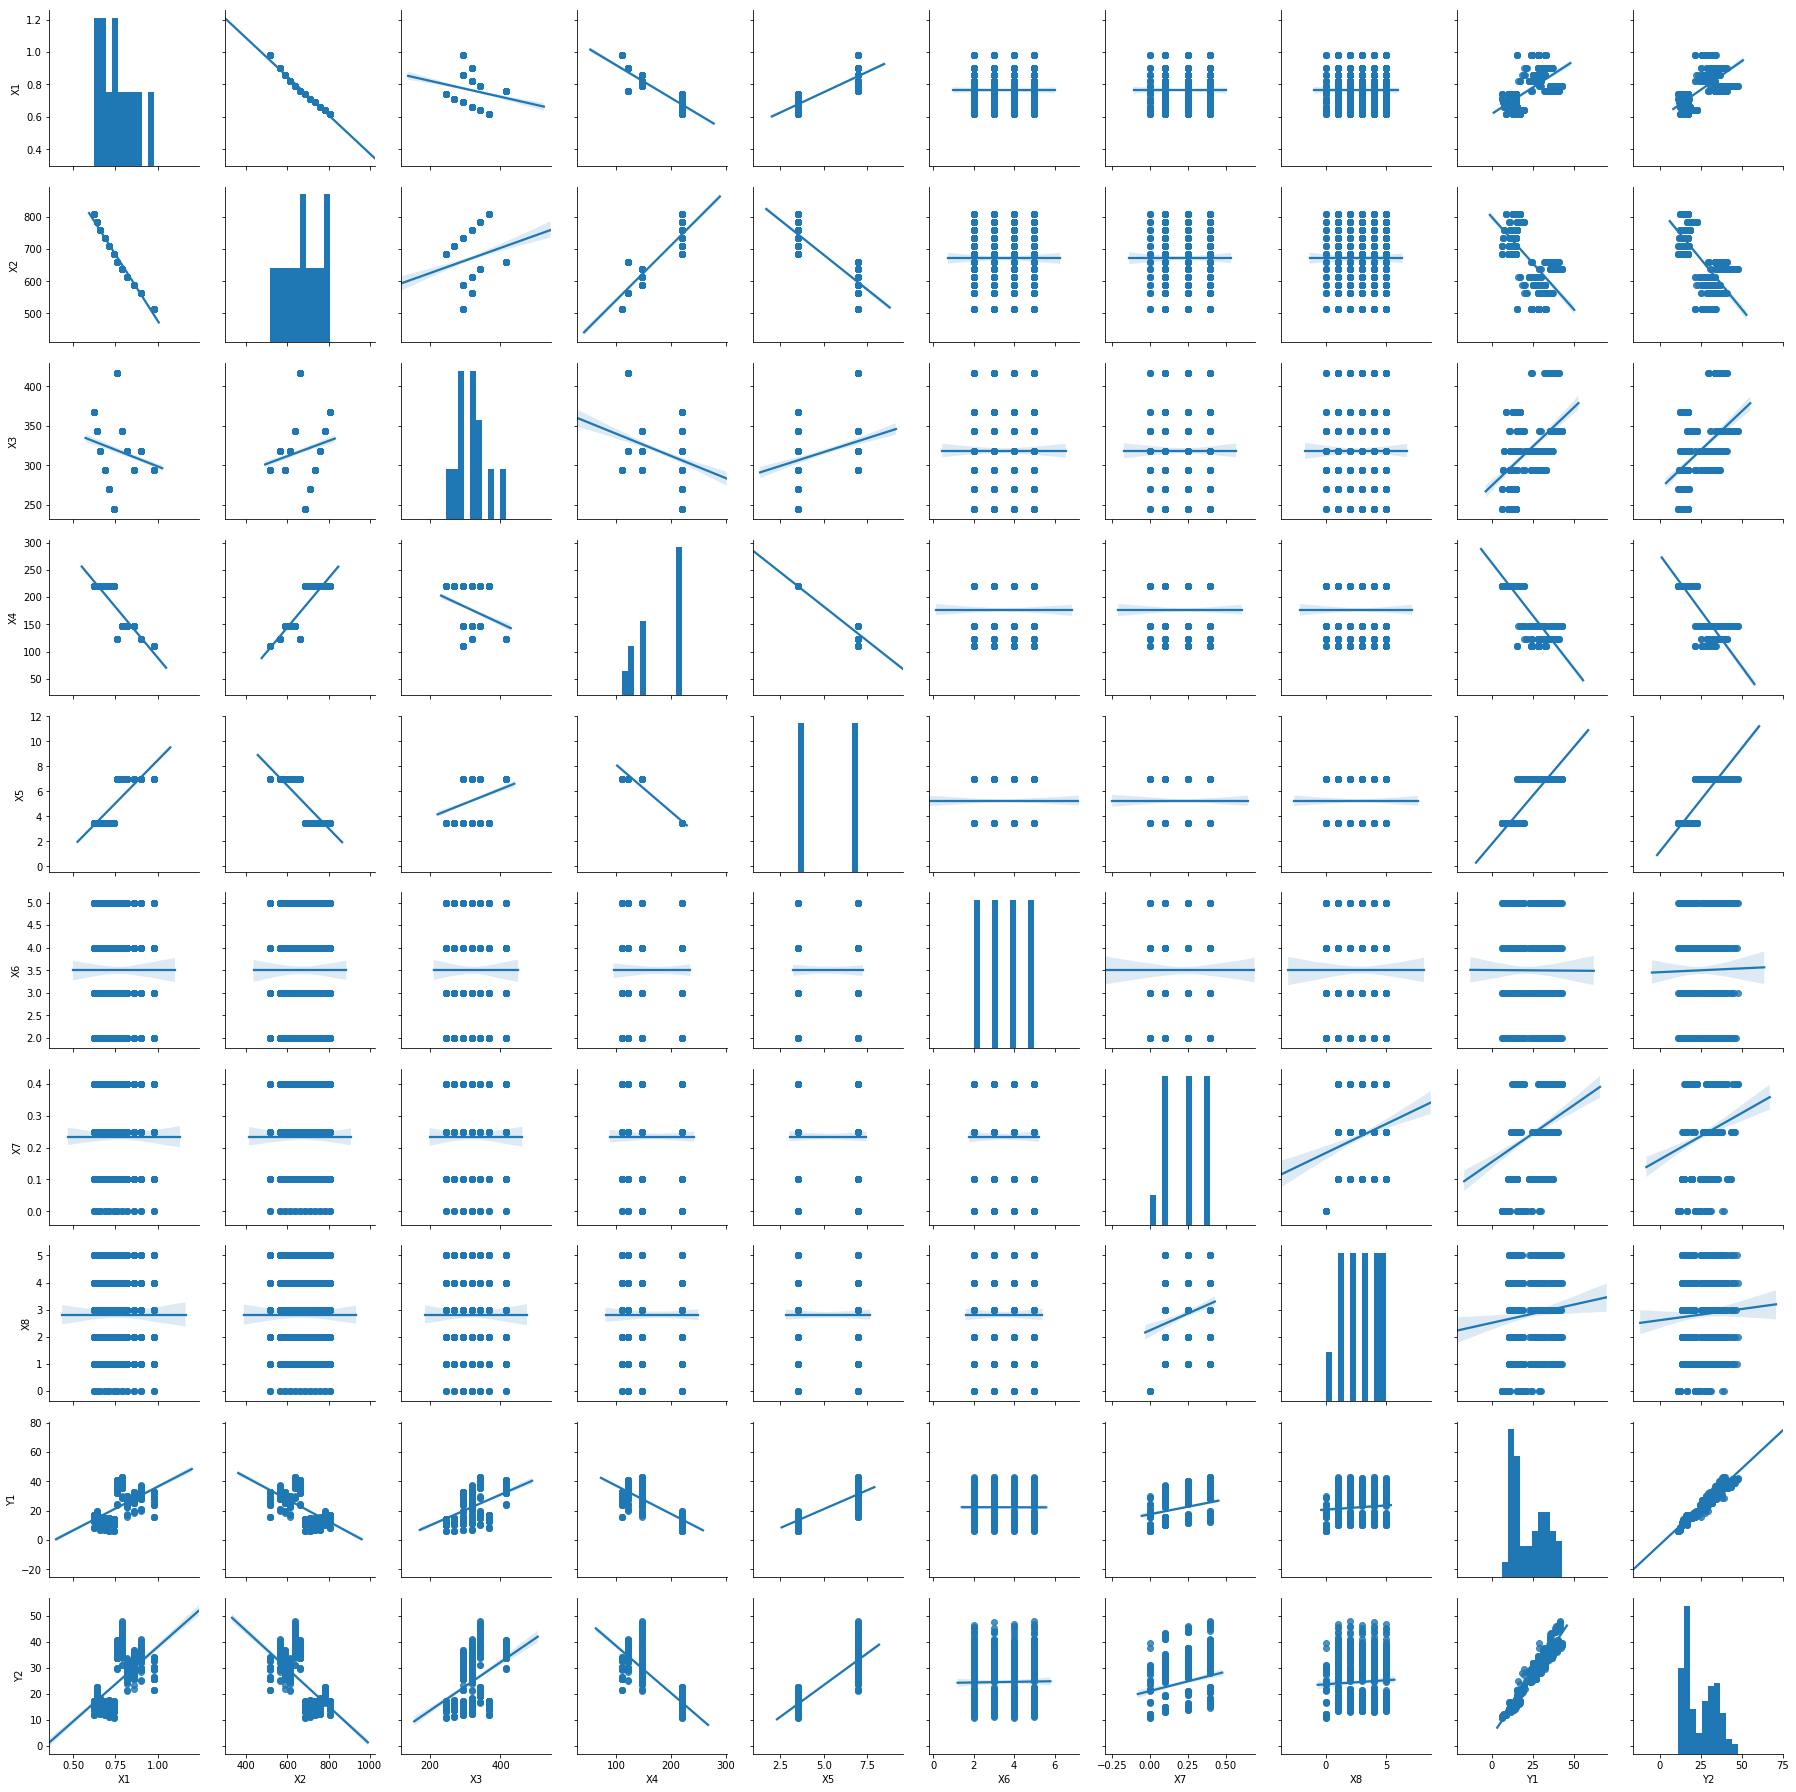

In [3]:
sns.pairplot(df, kind='reg')

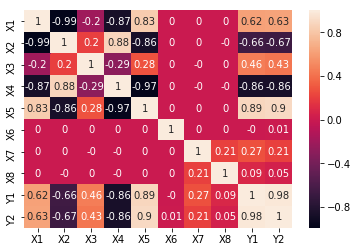

In [4]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
#X=features, y=target
X=df[['X1','X2','X3','X4','X5','X6','X7','X8','Y1']]
y=df['Y2']

In [6]:
from sklearn.linear_model import LinearRegression

malli=LinearRegression()
malli.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
malli.intercept_

24.86901041666667

In [8]:
malli.coef_

array([-1.50209470e+01,  3.44934490e+11, -3.44934490e+11, -6.89868980e+11,
        6.69532655e-01,  1.42540410e-01, -2.56234879e+00, -1.35468494e-01,
        8.67070361e-01])

In [9]:
malli.score(X,y) 

0.9585035422279146

Text(0, 0.5, 'Poikkeama todellisesta')

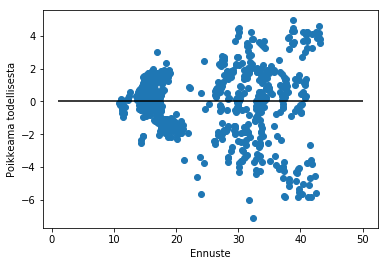

In [10]:
#Mallin virhetermit:
plt.scatter(malli.predict(X), malli.predict(X)-y)

#Vaakaviiva nollapoikkeaman kohdalle:
plt.hlines(y=0,xmin=1,xmax=50)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

Text(0, 0.5, 'Ennuste')

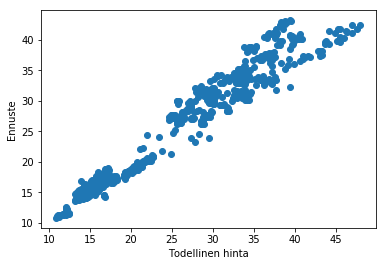

In [11]:
plt.scatter(df['Y2'], malli.predict(X))

plt.xlabel('Todellinen hinta')
plt.ylabel('Ennuste')

In [12]:
#Perinteisempi regressio-statistiikka statsmodels-kirjastosta
import statsmodels.api as sm

X = sm.add_constant(X)
malli_sm = sm.OLS(y, X)
results = malli_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2197.
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        12:01:56   Log-Likelihood:                -1596.4
No. Observations:                 768   AIC:                             3211.
Df Residuals:                     759   BIC:                             3253.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4355     12.781      1.912      0.0